## Linear regression <a id="1.6"></a>

So far you've learned that TensorFlow is a Numpy-like library that is GPU or TPU accelerated, with automatic differentiation. Time for an end-to-end example: let's implement a linear regression, the FizzBuzz of Machine Learning.

For the sake of demonstration, we won't use any of the higher-level Keras components like Layer or MeanSquaredError. Just basic ops.


In [4]:
import tensorflow as tf



In [5]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
        
        dloss_dw, dloss_db = tape.gradient(loss, [w,b])
    w.assign_sub(learning_rate* dloss_dw)
    b.assign_sub(learning_rate* dloss_db)
    return loss

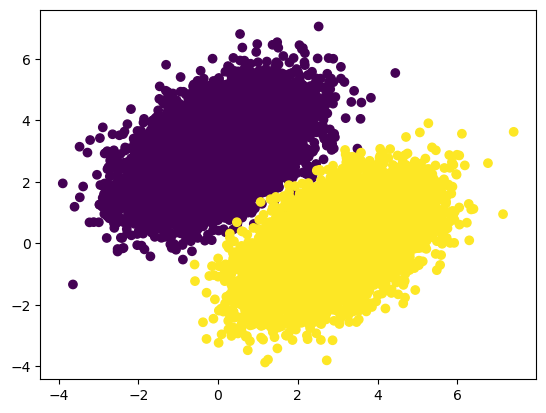

In [6]:
# Lets generate some artifical data
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

Now let's train our linear regression by iterating over batch-by-batch over the data and repeatedly calling `train_on_batch`:

In [7]:
# shuffle data
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
ds = tf.data.Dataset.from_tensor_slices((features, labels))
ds = ds.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
    for step, (x,y) in enumerate(ds):
        loss = train_on_batch(x, y)
    print(f"Epoch {epoch}: last batch loss= {float(loss)}")

Epoch 0: last batch loss= 0.07616433501243591
Epoch 1: last batch loss= 0.037392038851976395
Epoch 2: last batch loss= 0.04426822066307068
Epoch 3: last batch loss= 0.032198697328567505
Epoch 4: last batch loss= 0.03593677282333374
Epoch 5: last batch loss= 0.021610863506793976
Epoch 6: last batch loss= 0.021499518305063248
Epoch 7: last batch loss= 0.04305427521467209
Epoch 8: last batch loss= 0.027172569185495377
Epoch 9: last batch loss= 0.020106887444853783


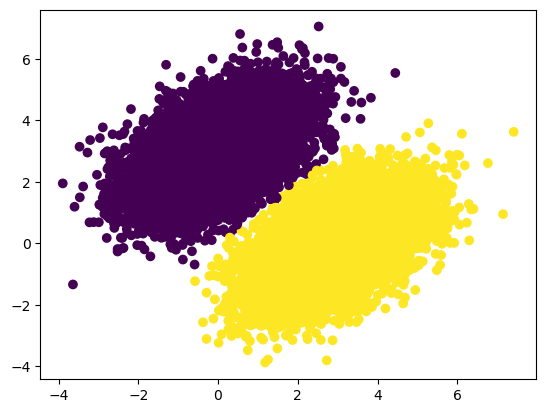

In [8]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)